In [ ]:
import random
import os

<h1> Step 1: Split the dataset into training and testing sets</h1>

In [ ]:
angry_files = []
angry_test = []
for filename in os.listdir("data_folder/angry/"):
    f = os.path.join("./data_folder/angry/", filename)
    if os.path.isfile:
        angry_files.append(f)
angry_training=random.sample(angry_files, k=70)
for file in angry_files:
    if file not in angry_training:
        angry_test.append(file)

fear_files = []
fear_test = []
for filename in os.listdir("data_folder/fear/"):
    f = os.path.join("./data_folder/fear/", filename)
    if os.path.isfile:
        fear_files.append(f)
fear_training=random.sample(fear_files, k=70)
for file in fear_files:
    if file not in fear_training:
        fear_test.append(file)

happy_files = []
happy_test = []
for filename in os.listdir("data_folder/happy/"):
    f = os.path.join("./data_folder/happy/", filename)
    if os.path.isfile:
        happy_files.append(f)
happy_training=random.sample(happy_files, k=70)
for file in happy_files:
    if file not in happy_training:
        happy_test.append(file)

sad_files = []
sad_test = []
for filename in os.listdir("data_folder/sad/"):
    f = os.path.join("./data_folder/sad/", filename)
    if os.path.isfile:
        sad_files.append(f)
sad_training=random.sample(sad_files, k=70)
for file in sad_files:
    if file not in sad_training:
        sad_test.append(file)


<h1>Step 2: Exploratory Data Analysis</h1>

In [4]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# label distribution of dataset
df_angry_training = pd.DataFrame(angry_training, columns=["Track"])
df_angry_test = pd.DataFrame(angry_test, columns=["Track"])

df_fear_training = pd.DataFrame(fear_training, columns=["Track"])
df_fear_test = pd.DataFrame(fear_test, columns=["Track"])

df_happy_training = pd.DataFrame(happy_training, columns=["Track"])
df_happy_test = pd.DataFrame(happy_test, columns=["Track"])

df_sad_training = pd.DataFrame(sad_training, columns=["Track"])
df_sad_test = pd.DataFrame(sad_test, columns=["Track"])

df_happy_training.head()

,Track
0,./data_folder/happy/YAF_search_happy.wav
1,./data_folder/happy/YAF_rat_happy.wav
2,./data_folder/happy/YAF_tell_happy.wav
3,./data_folder/happy/YAF_mode_happy.wav
4,./data_folder/happy/YAF_take_happy.wav


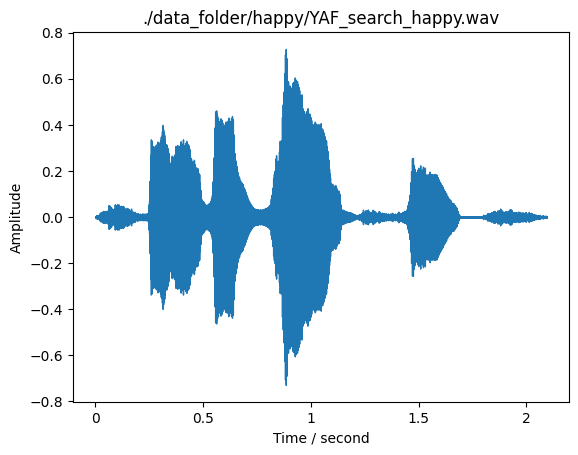

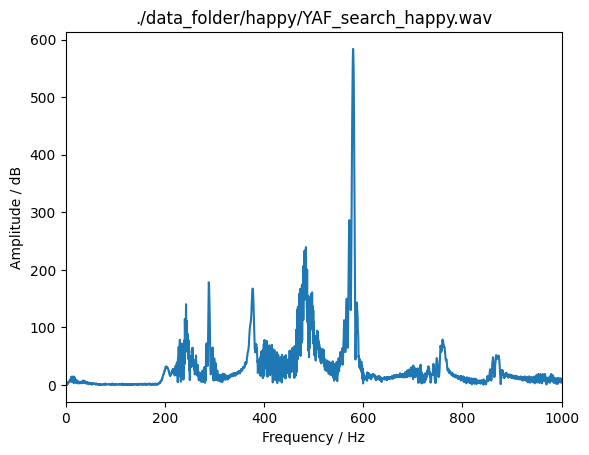

In [6]:
# plot audio in time and frequency domain
signal,sample_rate = librosa.load(happy_training[0])

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title(happy_training[0])
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.title(happy_training[0])
plt.xlim([0, 1000])
plt.show()

<h1>3: Acoustic Feature Extraction</h1>

In [7]:
from helpers import *
df_angry_test = getLoudness(df_angry_test, angry_test)
df_angry_test = getMelFreq(df_angry_test, angry_test)


In [8]:
# audio feature extraction: loudness
loudness = []
for sound in angry_test:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_angry_test["Loudness"] = loudness


loudness = []
for sound in angry_training:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_angry_training["Loudness"] = loudness

loudness = []
for sound in fear_test:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_fear_test["Loudness"] = loudness

loudness = []
for sound in fear_training:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_fear_training["Loudness"] = loudness


loudness = []
for sound in happy_test:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_happy_test["Loudness"] = loudness

loudness = []
for sound in happy_training:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_happy_training["Loudness"] = loudness

loudness = []
for sound in sad_test:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_sad_test["Loudness"] = loudness

loudness = []
for sound in sad_training:
    signal, sample_rate= librosa.load(sound)
    S,phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    loudness.append(rms[0])
df_sad_training["Loudness"] = loudness


In [9]:
# audio feature extraction: mel-frequency cepstral coefficients
mfccsList = dict()
for sound in angry_test:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_angry_test = pd.concat([df_angry_test, df_mfccs], axis = 1)

mfccsList = dict()
for sound in angry_training:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_angry_training = pd.concat([df_angry_training, df_mfccs], axis = 1)

mfccsList = dict()
for sound in fear_training:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_fear_training = pd.concat([df_fear_training, df_mfccs], axis = 1)

mfccsList = dict()
for sound in fear_test:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_fear_test = pd.concat([df_fear_test, df_mfccs], axis = 1)

mfccsList = dict()
for sound in happy_test:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_happy_test = pd.concat([df_happy_test, df_mfccs], axis = 1)

mfccsList = dict()
for sound in happy_training:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_happy_training = pd.concat([df_happy_training, df_mfccs], axis = 1)

mfccsList = dict()
for sound in sad_test:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_sad_test = pd.concat([df_sad_test, df_mfccs], axis = 1)

mfccsList = dict()
for sound in sad_training:
    signal, sample_rate = librosa.load(sound)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccsList['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
df_mfccs = pd.DataFrame(mfccsList)
df_sad_training = pd.concat([df_sad_training, df_mfccs], axis = 1)


In [10]:
# audio feature extraction: zero crossing rate
zcrList = []
for sound in angry_test:
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    zcrList.append(zcr[0])
df_angry_test["ZCR"] = zcrList



In [11]:
# audio feature extraction: chroma -> how much energy of each pitch class is in the signal

In [12]:
# audio feature extraction: mel spectrogram -> display pitch in a more regularized distribution